## The start:


* Importing Libraries:
* Objectives
* Exploratory Data Analysis
* Descriptive Analysis and probability Distributions:
* Preprocessing data: 
    * Filling in missing data
    * Transforming ordinal and categorical features
    * Standardisation/normalisation of numerical data    
* Classification machine models:
    * Logistic regression
    * Support Vector Machine 
    * Random Forest
    * Decision tree
    * K-nearest neighbors

* Summary
    * Classification report and cross-validation 
   


## Import needed packages and dataset

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler as ss, MinMaxScaler as mms
%matplotlib inline

# https://archive.ics.uci.edu/ml/datasets/bank+marketing
df = pd.read_csv('BankChurners.csv')
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Objectives:
* What is the best Machine learning model has more accuracy to expect churn and nonchurn customer? 
* Is there any relationship between features and the target varaible(Attrition_flag)?:<br>
* What could be the best features to predict cutomers churning? 

## Exploratory Data Analysis

In [2]:
# Dataset shpe
samples, features = df.shape
print(samples, 'number of samples with', features, 'features')

10127 number of samples with 21 features


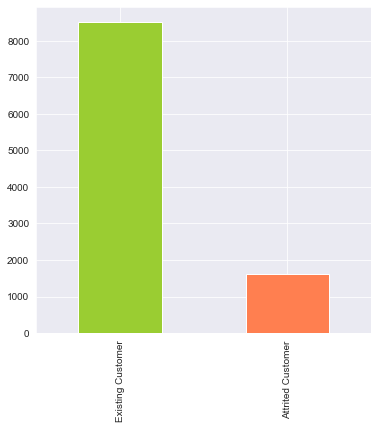

               index  Attrition_Flag
0  Existing Customer            8500
1  Attrited Customer            1627


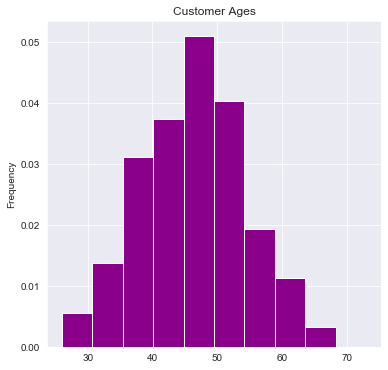

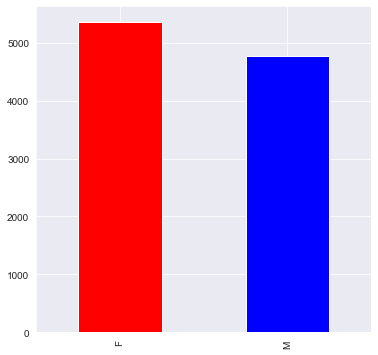

  index  Gender
0     F    5358
1     M    4769


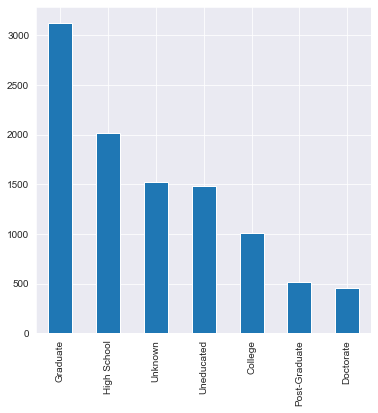

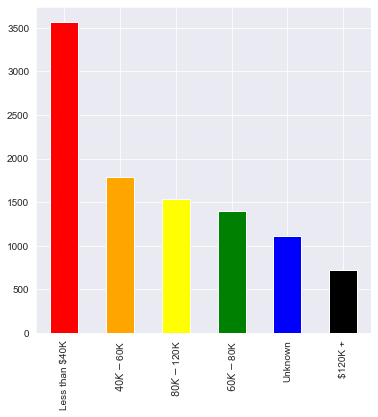

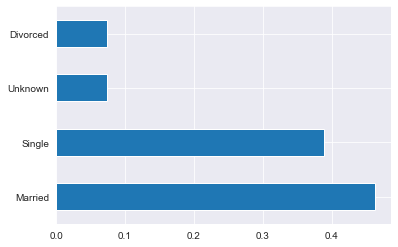

      index  Marital_Status
0   Married            4687
1    Single            3943
2   Unknown             749
3  Divorced             748


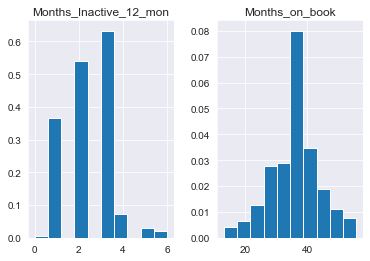

In [67]:
# define some commonly used figure sizes
big_figure = (8, 8)
normal_figure = (6, 6)

df['Attrition_Flag'].value_counts().plot.bar(figsize=normal_figure,color=['yellowgreen','coral'])
plt.show()
target = df['Attrition_Flag'].value_counts().reset_index()
print(target)


df['Customer_Age'].plot.hist(figsize=normal_figure, density=True, title='Customer Ages', color=['darkmagenta'])
plt.show()


df['Gender'].value_counts().plot.bar(figsize=normal_figure, color=['red','blue'])
plt.show()
target = df['Gender'].value_counts().reset_index()
print(target)

# good for categorical features
df['Education_Level'].value_counts().plot.bar(figsize=normal_figure)
plt.show()

# good for categorical features
df['Income_Category'].value_counts().plot.bar(figsize=normal_figure,color=['red', 'orange', 'yellow', 'green', 'blue','black'])
plt.show()

# good for getting the proportions of categorical features
df['Marital_Status'].value_counts(normalize=True).plot.barh()
plt.show()
numbers= df['Marital_Status'].value_counts().reset_index()
print(numbers)


df[['Months_on_book', 'Months_Inactive_12_mon']].hist(density=True)
plt.show()

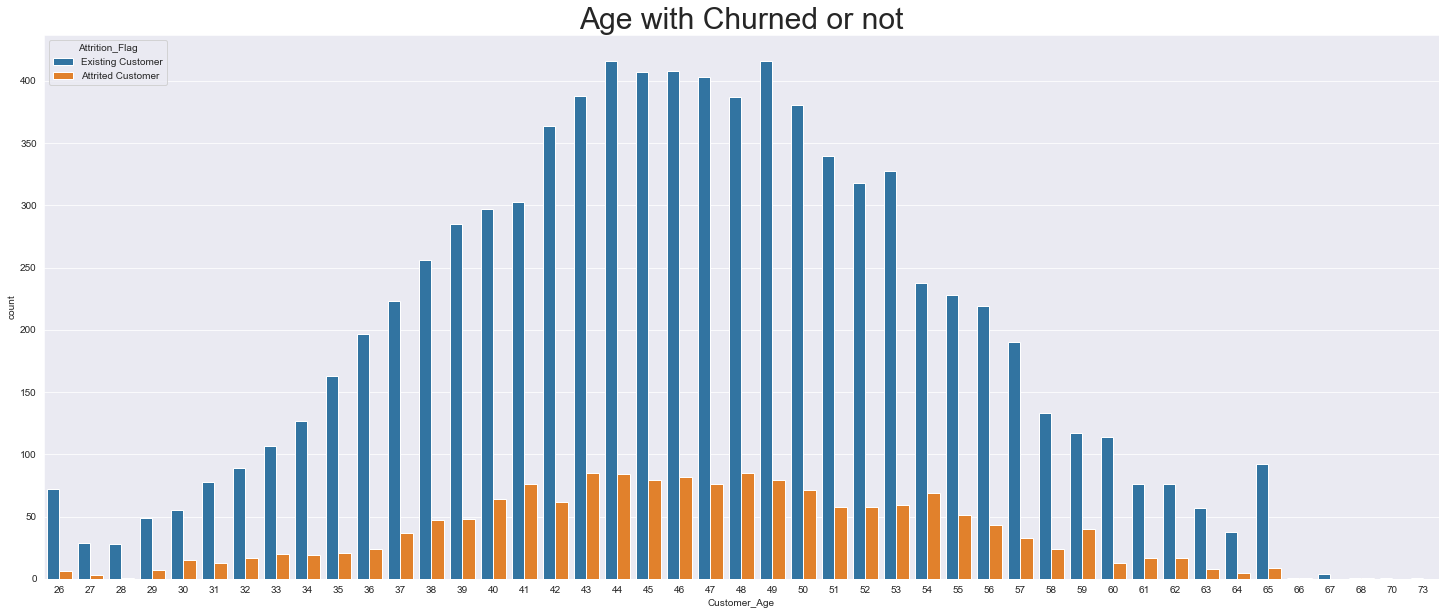

In [88]:
# Age with churned or not  
plt.figure(figsize = (25,10))
plt.title("Age with Churned or not", fontsize = 30)
sns.countplot(data = df, x = df["Customer_Age"], hue = "Attrition_Flag")

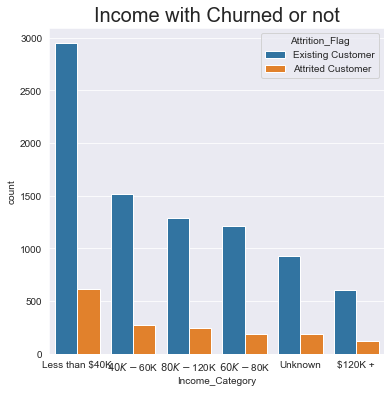

In [79]:
# Income with churned or not  
plt.figure(figsize = (6,6))
plt.title("Income with Churned or not", fontsize = 20)
sns.countplot(data = df, x = df["Income_Category"], hue = "Attrition_Flag", order=df["Income_Category"].value_counts().index)

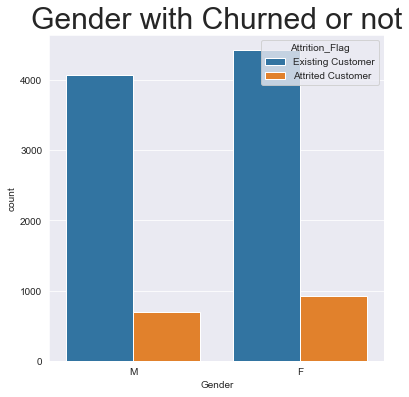

In [76]:
# gender with churned or not  
plt.figure(figsize = (6,6))
plt.title("Gender with Churned or not", fontsize = 30)
sns.countplot(data = df, x = df["Gender"], hue = "Attrition_Flag")

## Descriptive analysis

In [7]:
round(df.describe(),2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,3.690378e+07,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,7.130368e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,7.179264e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,7.731435e+08,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,8.283431e+08,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


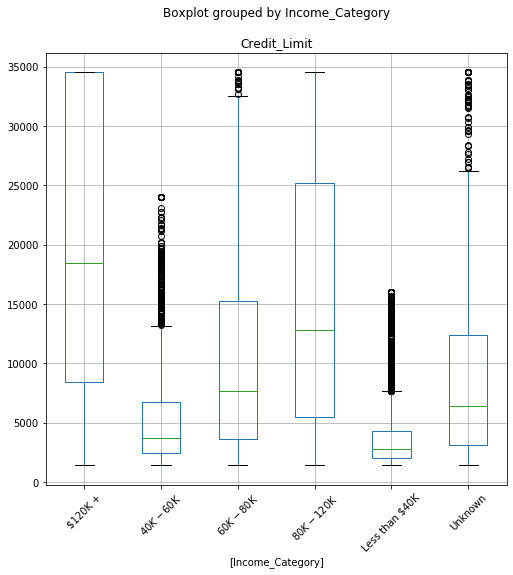

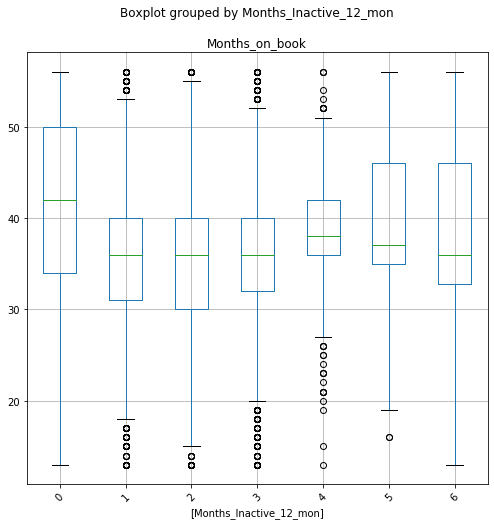

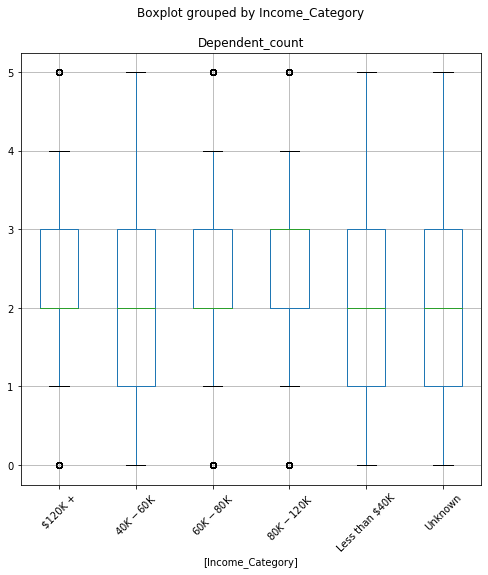

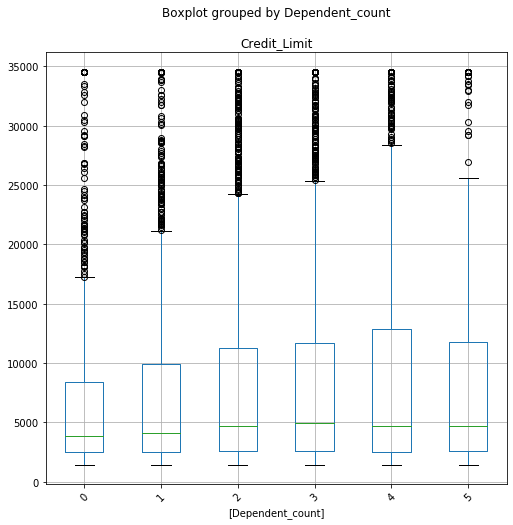

In [8]:
# Relationship between crdit limit and cutomers' financial capabilities.
df[['Credit_Limit', 'Income_Category']].boxplot(by='Income_Category', figsize=(8, 8), rot=45)
plt.show()
# Relatioship between months inactive and Months on book(duration since having the credit card)
df[['Months_Inactive_12_mon', 'Months_on_book']].boxplot(by='Months_Inactive_12_mon', figsize=(8, 8), rot=45)
plt.show()

df[['Dependent_count', 'Income_Category']].boxplot(by='Income_Category', figsize=(8, 8), rot=45)
plt.show()

df[['Dependent_count', 'Credit_Limit']].boxplot(by='Dependent_count', figsize=(8, 8), rot=45)
plt.show()



* The most correlated are :  <br>  (Months_on_book and Customer_Age)<br> (Total_Revolving_Bal and Avg_Utilization_Ratio )<br> (Total_Trans_Amt and Total_Trans_Ct)

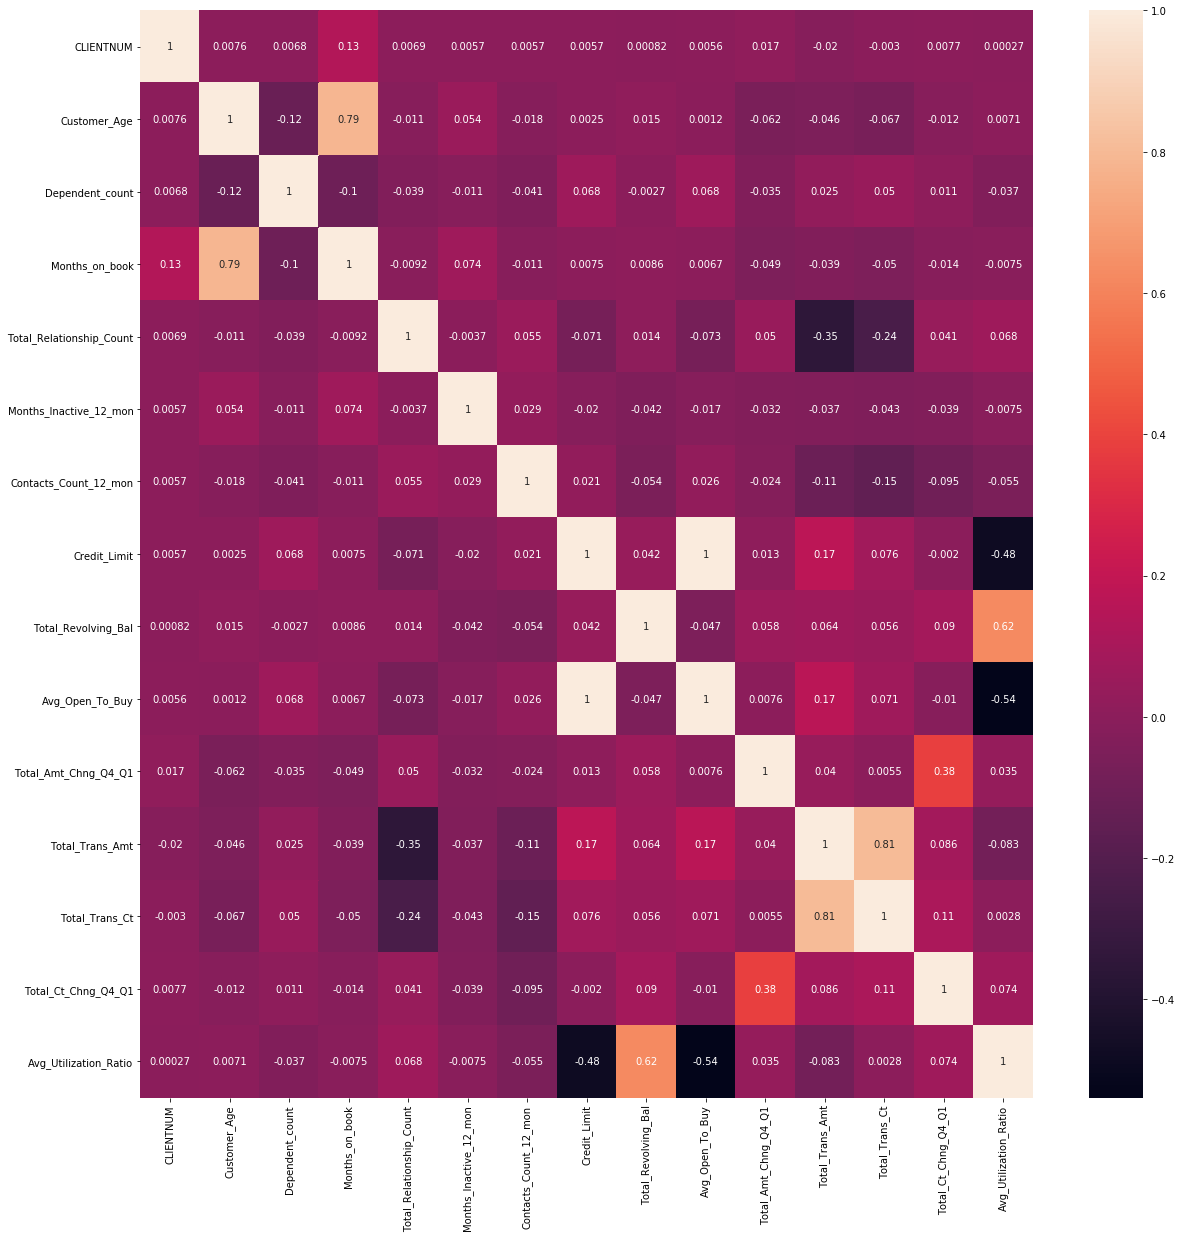

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()


# Preprocessing data 

## Missing values

In [10]:
# Now, check for missing values
print('Columns that have missing values'.center(64, '='))
column_missing = df.isna().any(axis=0)
print(column_missing)

================Columns that have missing values================
CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool


In [11]:
# Now, check for missing values
print('Rows that have missing values'.center(40, '*'))
rows_missing = df.isna().any(axis=0)
print(rows_missing)

*****Rows that have missing values******
CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool


In [12]:
# First, separate target variable from training data
y = df.copy()['Attrition_Flag']
# Second, create a copy of original dataframe
X = df.copy()
# Remove target variable from our newly copied dataframe
X.pop('Attrition_Flag')

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

## Perfect we move on
## Transforming data:

In [13]:
## Data type we working with 
X.dtypes

CLIENTNUM                     int64
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [14]:
y.head()

0    Existing Customer
1    Existing Customer
2    Existing Customer
3    Existing Customer
4    Existing Customer
Name: Attrition_Flag, dtype: object

In [15]:
from pandas.api.types import is_object_dtype

# We iterate over columns, we check whether X[col] is of type object or not.
# If it is, we print out the frequency table for each of the values.
for col in X.columns:
    if is_object_dtype(X[col]):
        print(X[col].value_counts(normalize=True))
        print()

F    0.529081
M    0.470919
Name: Gender, dtype: float64

Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64

Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64



In [16]:
# Transform again
#y.Attrition_Flag = y.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
X.Gender = X.Gender.replace({'F':1,'M':0})
X = pd.concat([X,pd.get_dummies(X['Education_Level']).drop(columns=['Unknown'])],axis=1)
X = pd.concat([X,pd.get_dummies(X['Income_Category']).drop(columns=['Unknown'])],axis=1)
X = pd.concat([X,pd.get_dummies(X['Marital_Status']).drop(columns=['Unknown'])],axis=1)
X = pd.concat([X,pd.get_dummies(X['Card_Category']).drop(columns=['Platinum'])],axis=1)
X.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)


In [17]:
y = pd.get_dummies(y, drop_first=True)
y.tail()

,Existing Customer
10122,1
10123,0
10124,0
10125,0
10126,0


In [18]:
X.tail()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
10122,50,0,2,40,3,2,3,4003.0,1851,2152.0,...,1,0,0,0,0,0,1,1,0,0
10123,41,0,2,25,4,2,3,4277.0,2186,2091.0,...,1,0,0,0,1,0,0,1,0,0
10124,44,1,1,36,5,3,4,5409.0,0,5409.0,...,0,0,0,1,0,1,0,1,0,0
10125,30,0,2,36,4,3,3,5281.0,0,5281.0,...,1,0,0,0,0,0,0,1,0,0
10126,43,1,2,25,6,2,4,10388.0,1961,8427.0,...,0,0,0,1,0,1,0,0,0,1


In [19]:
# Here, we normalise/standardise the features, which means we make them have
# 0 mean and standard deviation of 1. Another name for this technique is Z scores.
# Read more here: https://en.wikipedia.org/wiki/Normalization_(statistics)
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object - by doing this, we can save the parameters
# we used for standardisation to get back the data in un-standardised form again.
scaler = StandardScaler()
Xnum = scaler.fit_transform(X)

# y.values gives us access to the numpy array underlying the dataframe y
# .ravel() makes it so that the values are in a 1D numpy array, which is required
# by some Scikit-learn algorithms
ynum = y.values.ravel()

## Classification

## Logistic Regression 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Let's do a simple logistic regression.
classifier = LogisticRegression(solver='liblinear')
# Let's create a training and testing data set
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnum, ynum, test_size=0.30, random_state =0 )

# Train our regressor
classifier.fit(Xtrain, ytrain)
# We can easily calculate the mean accuracy of our classifier by using .score():
print('Mean accuracy', classifier.score(Xtrain, ytrain))


Mean accuracy 0.9070259593679458


In [21]:
# However, mean accuracy gives us only one part of the story. To get a quick overview
# with more information about classification performance, use classification_report
from sklearn.metrics import classification_report

classifier = LogisticRegression(solver='liblinear')

# Training and getting predictions
classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)
print('LogisticRegression'.center(64, '='))
print(classification_report(ytest, ypred, target_names= ['Existing Customer', 'Attrited Customer']))
print('='*64)


=======================LogisticRegression=======================
                   precision    recall  f1-score   support

Existing Customer       0.72      0.60      0.65       456
Attrited Customer       0.93      0.96      0.94      2583

         accuracy                           0.90      3039
        macro avg       0.82      0.78      0.80      3039
     weighted avg       0.90      0.90      0.90      3039



In [22]:
# Let's compare our LogisticRegression performance to a classifier that simply predicts 'no' all the time.
# We create a DummyClassifier that classifies based on very simple rules. https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

from sklearn.dummy import DummyClassifier
dumb_classifier = DummyClassifier(strategy='most_frequent')
dumb_classifier.fit(Xtrain, ytrain)

print('DummyClassifier mean accuracy', dumb_classifier.score(Xtrain, ytrain))

DummyClassifier mean accuracy 0.8347911963882618


In [23]:
# What the hell? It is almost as good as our smart machine learning algorithm?!
# What gives?? Let's see the classification report.
print('DummyClassifier'.center(64, '='))
print(classification_report(ytest, dumb_classifier.predict(Xtest), target_names=['Existing Customer', 'Attrited Customer']))
print('='*64)

========================DummyClassifier=========================
                   precision    recall  f1-score   support

Existing Customer       0.00      0.00      0.00       456
Attrited Customer       0.85      1.00      0.92      2583

         accuracy                           0.85      3039
        macro avg       0.42      0.50      0.46      3039
     weighted avg       0.72      0.85      0.78      3039



C:\Users\dalal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


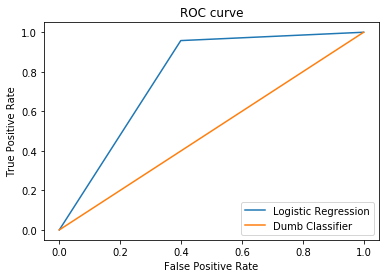

In [24]:
# Before showing how we can improve our classifier, there are yet other methods to evaluate
# the performance of our binary classifier that can be more reliable than the ones we have seen.
# A Receiver Operating Characteristic curve (ROC curve) will show a representation of the 
# TP rate of the classifier against the FP rate
from sklearn.metrics import roc_curve

# Given the two classifiers from above
classifier = LogisticRegression(solver='liblinear')
dumb_classifier = DummyClassifier(strategy='most_frequent')

# Training and getting predictions
classifier.fit(Xtrain, ytrain)
dumb_classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)
ypred_dumb = dumb_classifier.predict(Xtest)

# Now lets use the ROC metric to evaluate both models performance
fp_rate, tp_rate, _ = roc_curve(ytest, ypred)
fp_rate_dumb, tp_rate_dumb, _ = roc_curve(ytest, ypred_dumb)

# Lets create a simple plot to visualize the curves
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fp_rate, tp_rate, label='Logistic Regression')
plt.plot(fp_rate_dumb, tp_rate_dumb, label='Dumb Classifier')
plt.legend()

In [25]:
# From the curves above, we can see that indeed our classifier is better than
# the dummy classifier, despite their mean accuracies being close to each other.
# We can now compute the AUC (Area Under Curve) to make sure which one is better.
# Note that the higher AUC the better is the model
from sklearn.metrics import roc_auc_score

print("AUC of Logistic Regression ROC curve: %1.2f" % roc_auc_score(ytest, ypred))
print("AUC of Dumb Classifier ROC curve: %1.2f" % roc_auc_score(ytest, ypred_dumb))

AUC of Logistic Regression ROC curve: 0.78
AUC of Dumb Classifier ROC curve: 0.50


In [26]:
# In order for our classifier to get better at recognising successful outcomes,
# we can specify class_weight='balanced' to our LogisticRegression object.
# This makes it give less weight to samples from a class that appear frequently
# while increasing the weight for rarely occurring samples. 
classifier = LogisticRegression(solver='liblinear', class_weight='balanced')

# Training and getting predictions
classifier.fit(Xtrain, ytrain)
print('Balanced LogisticRegression mean accuracy', classifier.score(Xtest, ytest))
ypred = classifier.predict(Xtest)
print('Balanced LogisticRegression'.center(64, '='))
LOG_clf=classification_report(ytest, ypred, target_names=['Existing Customer', 'Attrited Customer'])
print(LOG_clf)
print('='*64)

Balanced LogisticRegression mean accuracy 0.8433695294504772
==================Balanced LogisticRegression===================
                   precision    recall  f1-score   support

Existing Customer       0.49      0.85      0.62       456
Attrited Customer       0.97      0.84      0.90      2583

         accuracy                           0.84      3039
        macro avg       0.73      0.85      0.76      3039
     weighted avg       0.90      0.84      0.86      3039



In [27]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

# taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=5,
                        n_jobs=None, scoring=None):
    train_scores, test_scores = validation_curve(
        estimator, Xnum, ynum, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\dalal\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

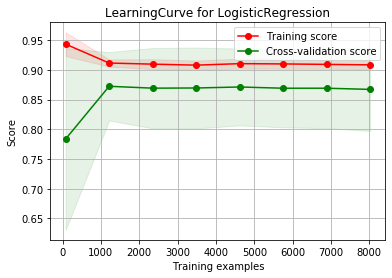

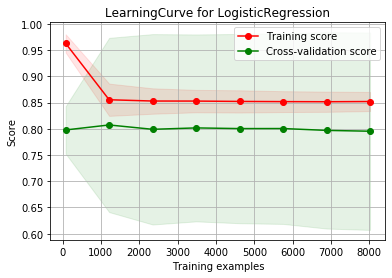

In [28]:
# We can use this function to illustrate how additional training data
# affects our learning algorithm's performance.
plot_learning_curve(LogisticRegression(solver='liblinear', penalty='l1'), 'LearningCurve for LogisticRegression', Xnum, ynum, cv=5, train_sizes=np.linspace(0.01, 0.99, 8))
plot_learning_curve(LogisticRegression(solver='liblinear', penalty='l1', class_weight='balanced'), 'LearningCurve for LogisticRegression', Xnum, ynum, cv=5, train_sizes=np.linspace(0.01, 0.99, 8))

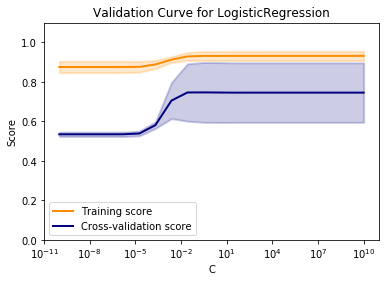

<module 'matplotlib.pyplot' from 'C:\\Users\\dalal\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [29]:
# We can use this function to illustrate how changing the variable C,
# the preference for a solution with small coefficients, affects our
# algorithm's performance.
from sklearn.model_selection import learning_curve
param_range = np.logspace(-10, 10, 20)
plot_validation_curve(LogisticRegression(solver='liblinear'), 'Validation Curve for LogisticRegression', Xnum, ynum, "C", param_range, cv=2)

In [30]:

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(classifier,Xnum , ynum, cv=2)
print(cv_score)
cvLR=("Average CV score: ", np.mean(cv_score))
print(cvLR)

[0.48538705 0.9164527 ]
('Average CV score: ', 0.700919870921804)


## Support Vector Machines

In [31]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnum , ynum, test_size=0.3,random_state=109) # 70% training and 30% test

In [32]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(Xtrain, ytrain)

#Predict the response for test dataset
ypred = clf.predict(Xtest)

In [33]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(clf, Xnum, ynum, cv=2)
print(cv_score)
cvSVM=("Average CV score: ", np.mean(cv_score))
print(cvSVM)

Accuracy: 0.9124712076340902
[0.59735387 0.86312463]
('Average CV score: ', 0.7302392500621708)


In [34]:
print('Support_vector_machine_Classifier'.center(64, '='))
SVM_clf=classification_report(ytest, ypred, target_names=['Existing Customer', 'Attrited Customer'])
print(SVM_clf)
print('='*64)

===============Support_vector_machine_Classifier================
                   precision    recall  f1-score   support

Existing Customer       0.79      0.58      0.67       466
Attrited Customer       0.93      0.97      0.95      2573

         accuracy                           0.91      3039
        macro avg       0.86      0.78      0.81      3039
     weighted avg       0.91      0.91      0.91      3039



#### Seems SVM has better accuracy than Logistic Regression

## Random Forest


In [35]:
# What are the best features to preditcs Attirtion_Flag?


C:\Users\dalal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


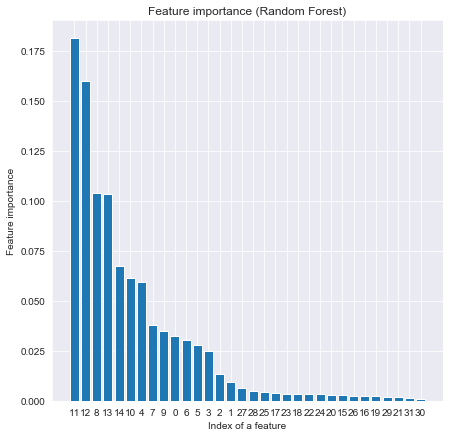

In [36]:
from sklearn.ensemble import RandomForestClassifier

sns.set_style('darkgrid')

forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X, y)

importances = forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(7,7))
plt.bar(range(len(indices)),importances[indices])
plt.xticks(range(len(indices)), indices)
plt.title("Feature importance (Random Forest)")
plt.xlabel('Index of a feature')
plt.ylabel('Feature importance')
plt.show()


In [37]:
list(X.iloc[:,indices[:6]].columns)

['Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Revolving_Bal',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Total_Amt_Chng_Q4_Q1']

In [38]:
#split dataset in features and target variable
features = ['Total_Trans_Amt',
             'Total_Trans_Ct',
             'Total_Ct_Chng_Q4_Q1',
             'Total_Revolving_Bal',
             'Total_Relationship_Count',
             'Total_Amt_Chng_Q4_Q1']

Xnumnew = X.loc[:,features]
ynumnew = y

In [39]:
scaler = StandardScaler()
Xnumnew = scaler.fit_transform(Xnumnew)
#ynumnew = y.values.ravel(ynumnew) ## Already been raveled!!!!!!!!!!!!!!!!!

In [40]:
X_train, X_test, y_train, y_test = train_test_split(Xnumnew, ynum, test_size=0.3,
                                                    random_state=0) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9568937150378414


In [41]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(clf, Xnumnew, ynum, cv=2)
print(cv_score)
cvRF=("Average CV score: ", np.mean(cv_score))
print(cvRF)

[0.56832543 0.80446376]
('Average CV score: ', 0.6863945955525934)


In [42]:
print('Random_Forest_Classifier'.center(64, '='))
RF_clf=classification_report(y_test, y_pred, target_names=['Existing Customer', 'Attrited Customer'])
print(RF_clf)
print('='*64)

====================Random_Forest_Classifier====================
                   precision    recall  f1-score   support

Existing Customer       0.87      0.84      0.85       456
Attrited Customer       0.97      0.98      0.97      2583

         accuracy                           0.96      3039
        macro avg       0.92      0.91      0.91      3039
     weighted avg       0.96      0.96      0.96      3039



##  Decision Tree Classification with Scikit-learn

In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [44]:
X_train, X_test, y_train, y_test = train_test_split(Xnum, ynum, test_size=0.3, random_state=0) # 70% training and 30% test

In [45]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9378084896347483


In [47]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(clf, Xnumnew, ynum, cv=2)
print(cv_score)
cvDST=("Average CV score: ", np.mean(cv_score))
print(cvDST)

[0.63309637 0.66363816]
('Average CV score: ', 0.6483672628514212)


In [48]:
# Wow, not bad! Let's generate a classification report to see if we get better results 
# than with LogisticRegression.
print('KNeighborsClassifier'.center(64, '='))
DST_clf=classification_report(y_test, y_pred, target_names=['Existing Customer', 'Attrited Customer'])
print(DST_clf)
print('='*64)

======================KNeighborsClassifier======================
                   precision    recall  f1-score   support

Existing Customer       0.78      0.81      0.80       456
Attrited Customer       0.97      0.96      0.96      2583

         accuracy                           0.94      3039
        macro avg       0.87      0.88      0.88      3039
     weighted avg       0.94      0.94      0.94      3039



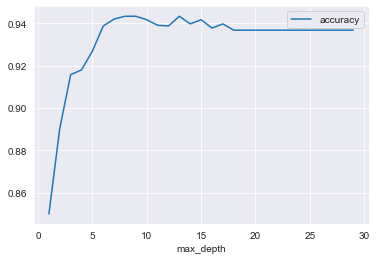

In [49]:
decision_tree_results = []

for i in range(1, 30):
    model=DecisionTreeClassifier(max_depth=i, random_state=0)
    model.fit(X_train, np.ravel(y_train))
    score = model.score(X_test,y_test)
    decision_tree_results.append({
        'max_depth': i,
        'accuracy': score
    })
    
pd.DataFrame(decision_tree_results).set_index('max_depth').plot()

## KNN

In [50]:
# K nearest neighbors is a classifier that predicts the class of an input sample
# based on the class of the K nearest neighbors to our input. Let's see how well it performs
# on our marketing data.

from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
classifier = KNeighborsClassifier()

# Let's create a training and testing data set
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnum, ynum, test_size=0.33, random_state = 0)

# Train our regressor
classifier.fit(Xtrain, ytrain)

ypred = classifier.predict(Xtest)

print('Mean accuracy', classifier.score(Xtrain, ytrain))

Mean accuracy 0.9056742815033162


In [ ]:
fig, ax = plt.subplots()
ax.scatter(ytrain, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(classifier, Xnum, ynum, cv=2)
print(cv_score)
cvKNN=("Average CV score: ", np.mean(cv_score))
print(cvKNN)

[0.8414297  0.87063006]
('Average CV score: ', 0.8560298805352713)


In [52]:
# Wow, not bad! Let's generate a classification report to see if we get better results 
# than with LogisticRegression.
print('KNeighborsClassifier'.center(64, '='))
KNN_clf=classification_report(ytest, ypred, target_names=['Existing Customer', 'Attrited Customer'])
print(KNN_clf)
print('='*64)

======================KNeighborsClassifier======================
                   precision    recall  f1-score   support

Existing Customer       0.76      0.35      0.47       507
Attrited Customer       0.89      0.98      0.93      2835

         accuracy                           0.88      3342
        macro avg       0.83      0.66      0.70      3342
     weighted avg       0.87      0.88      0.86      3342



In [53]:
# seems pretty good 

In [54]:
clfs=[LOG_clf,SVM_clf,RF_clf,DST_clf,KNN_clf]
labels=['Logistic_Regression','Support_Vector_Classifier','Random_forest_Classifier','DecisionTreeClassifier',
        'k_nearest_neighbors_Classifier']
cross_validation =[cvLR,cvSVM,cvRF,cvDST,cvKNN]
def myshow(x):
        print(labels[0].center(64, '='))
        print(clfs[0])
        print(cross_validation[0])
        print(labels[1].center(64, '='))
        print(clfs[1])
        print(cross_validation[1])
        print(labels[2].center(64, '='))
        print(clfs[2])
        print(cross_validation[2])
        print(labels[3].center(64, '='))
        print(clfs[3])
        print(cross_validation[3])
        print(labels[4].center(64, '='))
        print(clfs[4])
        print(cross_validation[4])
myshow(clfs)        

======================Logistic_Regression=======================
                   precision    recall  f1-score   support

Existing Customer       0.49      0.85      0.62       456
Attrited Customer       0.97      0.84      0.90      2583

         accuracy                           0.84      3039
        macro avg       0.73      0.85      0.76      3039
     weighted avg       0.90      0.84      0.86      3039

('Average CV score: ', 0.700919870921804)
===================Support_Vector_Classifier====================
                   precision    recall  f1-score   support

Existing Customer       0.79      0.58      0.67       466
Attrited Customer       0.93      0.97      0.95      2573

         accuracy                           0.91      3039
        macro avg       0.86      0.78      0.81      3039
     weighted avg       0.91      0.91      0.91      3039

('Average CV score: ', 0.7302392500621708)
====================Random_forest_Classifier====================
      

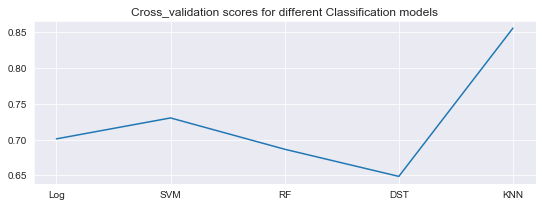

In [64]:
scores=[]
labels= ['Log','SVM','RF','DST','KNN']
for i in cross_validation:
    scores.append(i[1])
plt.figure(figsize=(9, 3)) 
plt.title('Cross_validation scores for different Classification models')
plt.plot(labels, scores)
plt.show()    